In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

pd.set_option ("display.max_rows", None)
pd.set_option ("display.max_columns", None)
pd.set_option ("display.max_colwidth",200)

In [2]:
df=pd.read_csv("paso_1.csv", sep=',')

In [3]:
df.dtypes

Unnamed: 0                                  int64
building_id                                 int64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64


In [4]:
df.drop(["Unnamed: 0", "district_id", "vdcmun_id", "household_id"], axis=1, inplace=True)

# 1. Balanceo de clases

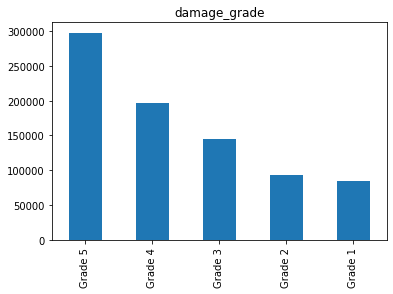

Grade 5    36.363381
Grade 4    24.100281
Grade 3    17.764260
Grade 2    11.407842
Grade 1    10.364236
Name: damage_grade, dtype: float64


In [5]:
df["damage_grade"].value_counts().plot(kind='bar', title="damage_grade")
plt.show()
print(100 * df['damage_grade'].value_counts() / len(df['damage_grade']))

### Agrupamos las clases:

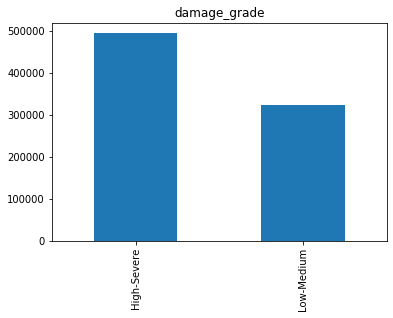

High-Severe    60.463662
Low-Medium     39.536338
Name: damage_grade, dtype: float64


In [6]:
# Agrupamos los daños en:
# Low-Medium: G1 + G2 + G3
# High-Severe: G4 + G5


df["damage_grade"].replace(["Grade 1", "Grade 2", "Grade 3"], "Low-Medium", regex=True, inplace= True)
df["damage_grade"].replace(["Grade 5", "Grade 4"], "High-Severe", regex=True, inplace= True)


df["damage_grade"].value_counts().plot(kind='bar', title="damage_grade")
plt.show()
print(100 * df['damage_grade'].value_counts() / len(df['damage_grade']))

# 3. Relaciónes con el target

## Variables Categóricas

### Land Surface Condition: agrupada

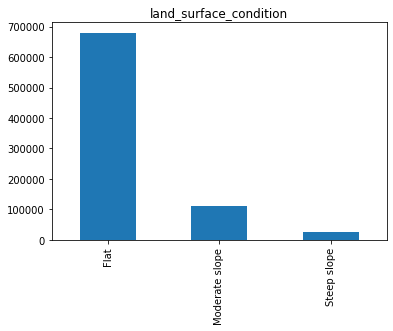

Flat              83.066080
Moderate slope    13.712349
Steep slope        3.221571
Name: land_surface_condition, dtype: float64

damage_grade            High-Severe  Low-Medium
land_surface_condition                         
Flat                      82.575311   83.816624
Moderate slope            13.974498   13.311440
Steep slope                3.450192    2.871937



In [8]:
df["land_surface_condition"].value_counts().plot(kind='bar', title="land_surface_condition")
plt.show()
print(100 * df['land_surface_condition'].value_counts() / len(df['land_surface_condition']))
print('')
print(pd.crosstab(index=df["land_surface_condition"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [9]:
# No se ve una relación directa de las categorías con el Target. los % son parecidos en todos los grados.
# Agrupamos 2 categorias en un "No Flat"

In [7]:
df["land_surface_condition"].replace(["Moderate slope", "Steep slope"], "No Flat", regex=True, inplace= True)

In [8]:
print(100 * df['land_surface_condition'].value_counts() / len(df['land_surface_condition']))
print('')
print(pd.crosstab(index=df["land_surface_condition"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Flat       83.06608
No Flat    16.93392
Name: land_surface_condition, dtype: float64

damage_grade            High-Severe  Low-Medium
land_surface_condition                         
Flat                      82.575311   83.816624
No Flat                   17.424689   16.183376


### Foundation Type: agrupada

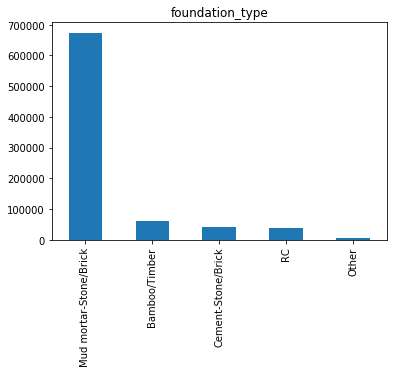

Mud mortar-Stone/Brick    82.347746
Bamboo/Timber              7.269696
Cement-Stone/Brick         5.203371
RC                         4.592158
Other                      0.587028
Name: foundation_type, dtype: float64

damage_grade            High-Severe  Low-Medium
foundation_type                                
Bamboo/Timber              2.848595   14.030968
Cement-Stone/Brick         2.521131    9.305372
Mud mortar-Stone/Brick    93.866259   64.732270
Other                      0.494731    0.728179
RC                         0.269284   11.203211



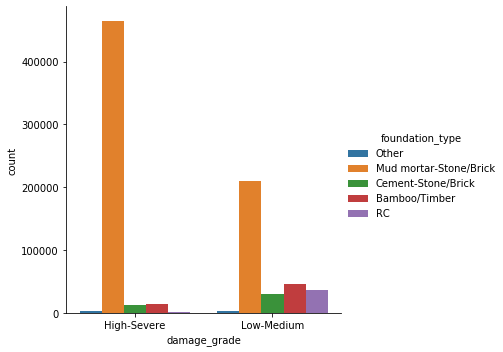

In [11]:
df["foundation_type"].value_counts().plot(kind='bar', title="foundation_type")
plt.show()
print(100 * df['foundation_type'].value_counts() / len(df['foundation_type']))
print('')
print(pd.crosstab(index=df["foundation_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "foundation_type", order=order)

In [19]:
# Si hay una relación con el tipo de grado.
# Grados bajos: RC, Bamboo y cement 
# Agrupamos y dejamos solo 2 categorias

In [9]:
df["foundation_type"].replace(["Bamboo/Timber", "Cement-Stone/Brick","RC", "Other"], "others", regex=True, inplace= True)

In [10]:
print(100 * df['foundation_type'].value_counts() / len(df['foundation_type']))
print('')
print(pd.crosstab(index=df["foundation_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Mud mortar-Stone/Brick    82.347746
others                    17.652254
Name: foundation_type, dtype: float64

damage_grade            High-Severe  Low-Medium
foundation_type                                
Mud mortar-Stone/Brick    93.866259    64.73227
others                     6.133741    35.26773


### Roof Type

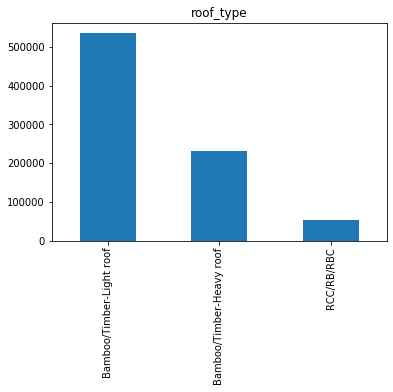

Bamboo/Timber-Light roof    65.343349
Bamboo/Timber-Heavy roof    28.315867
RCC/RB/RBC                   6.340784
Name: roof_type, dtype: float64

damage_grade              High-Severe  Low-Medium
roof_type                                        
Bamboo/Timber-Heavy roof    30.213771   25.413366
Bamboo/Timber-Light roof    69.205036   59.437600
RCC/RB/RBC                   0.581193   15.149034



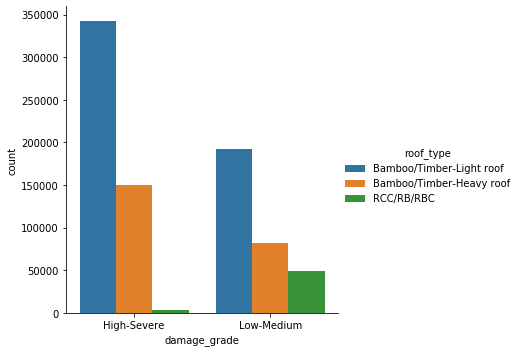

In [16]:
df["roof_type"].value_counts().plot(kind='bar', title="roof_type")
plt.show()
print(100 * df['roof_type'].value_counts() / len(df['roof_type']))
print('')
print(pd.crosstab(index=df["roof_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "roof_type", order=order)

### Ground Floor Type: agrupada

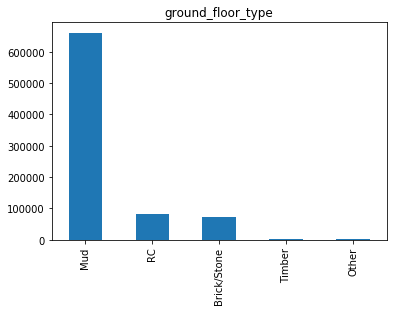

Mud            80.703921
RC             10.028460
Brick/Stone     8.679980
Timber          0.451692
Other           0.135947
Name: ground_floor_type, dtype: float64

damage_grade       High-Severe  Low-Medium
ground_floor_type                         
Brick/Stone           9.288387    7.749533
Mud                  88.497948   68.784370
Other                 0.068483    0.239122
RC                    1.788629   22.629787
Timber                0.356554    0.597187



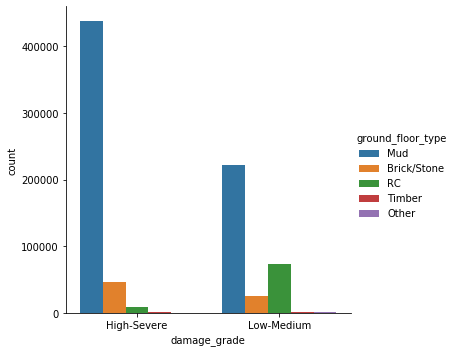

In [17]:
df["ground_floor_type"].value_counts().plot(kind='bar', title="ground_floor_type")
plt.show()
print(100 * df['ground_floor_type'].value_counts() / len(df['ground_floor_type']))
print('')
print(pd.crosstab(index=df["ground_floor_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "ground_floor_type", order=order)

In [25]:
# Si hay una relación. 
# grados bajos, RC
# Dejamos 3 categorias

In [10]:
df["ground_floor_type"].replace(["Timber", "Other", "Brick/Stone"], "others", regex=True, inplace= True)

In [12]:
print(100 * df['ground_floor_type'].value_counts() / len(df['ground_floor_type']))
print('')
print(pd.crosstab(index=df["ground_floor_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Mud       80.703921
RC        10.028460
others     9.267619
Name: ground_floor_type, dtype: float64

damage_grade       High-Severe  Low-Medium
ground_floor_type                         
Mud                  88.497948   68.784370
RC                    1.788629   22.629787
others                9.713423    8.585843


### Other Floor Type: agrupada

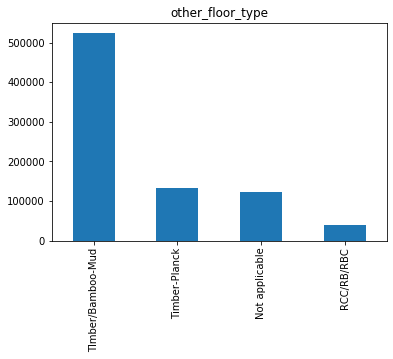

TImber/Bamboo-Mud    63.935263
Timber-Planck        16.178942
Not applicable       15.059118
RCC/RB/RBC            4.826676
Name: other_floor_type, dtype: float64

damage_grade       High-Severe  Low-Medium
other_floor_type                          
Not applicable       10.219064   22.461104
RCC/RB/RBC            0.612707   11.271178
TImber/Bamboo-Mud    72.219080   51.266667
Timber-Planck        16.949149   15.001050



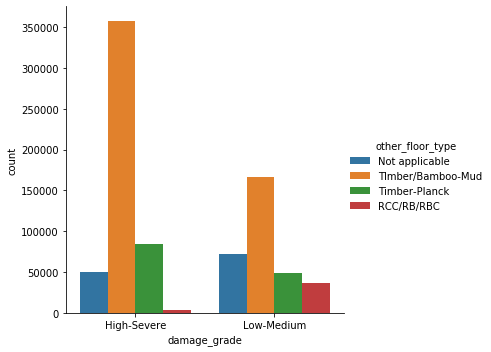

In [20]:
df["other_floor_type"].value_counts().plot(kind='bar', title="other_floor_type")
plt.show()
print(100 * df['other_floor_type'].value_counts() / len(df['other_floor_type']))
print('')
print(pd.crosstab(index=df["other_floor_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "other_floor_type", order=order)

In [29]:
# Si hay una relación. 
# El los grados bajos, RC y Not applicable aparece más % que en Grados altos
# Dejar 3 categorias

In [11]:
df["other_floor_type"].replace(["TImber/Bamboo-Mud", "Timber-Planck"], "Timber", regex=True, inplace= True)

In [14]:
print(100 * df['other_floor_type'].value_counts() / len(df['other_floor_type']))
print('')
print(pd.crosstab(index=df["other_floor_type"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Timber            80.114205
Not applicable    15.059118
RCC/RB/RBC         4.826676
Name: other_floor_type, dtype: float64

damage_grade      High-Severe  Low-Medium
other_floor_type                         
Not applicable      10.219064   22.461104
RCC/RB/RBC           0.612707   11.271178
Timber              89.168229   66.267718


### Position: agrupada

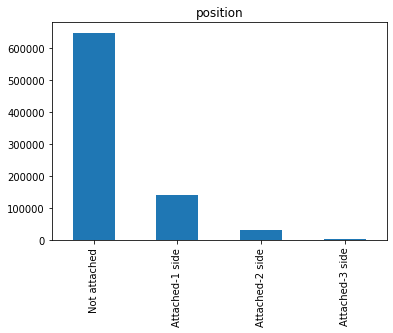

Not attached       79.073775
Attached-1 side    17.067302
Attached-2 side     3.677904
Attached-3 side     0.181019
Name: position, dtype: float64

damage_grade     High-Severe  Low-Medium
position                                
Attached-1 side    18.367689   15.078595
Attached-2 side     2.841928    4.956377
Attached-3 side     0.107067    0.294114
Not attached       78.683315   79.670914



In [23]:
df["position"].value_counts().plot(kind='bar', title="position")
plt.show()
print(100 * df['position'].value_counts() / len(df['position']))
print('')
print(pd.crosstab(index=df["position"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [33]:
# Se puede ver  ligeramente. Si está attached a los 2 lados, hay menos daños.
# Agrupar 2+3 en >1

In [12]:
df["position"].replace(["Attached-2 side", "Attached-3 side"], "Attached >1 side", regex=True, inplace= True)

In [11]:
print(100 * df['position'].value_counts() / len(df['position']))
print('')
print(pd.crosstab(index=df["position"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Not attached        79.073775
Attached-1 side     17.067302
Attached >1 side     3.858923
Name: position, dtype: float64

damage_grade      High-Severe  Low-Medium
position                                 
Attached >1 side     2.948996    5.250491
Attached-1 side     18.367689   15.078595
Not attached        78.683315   79.670914


### Plan configuration: agrupada

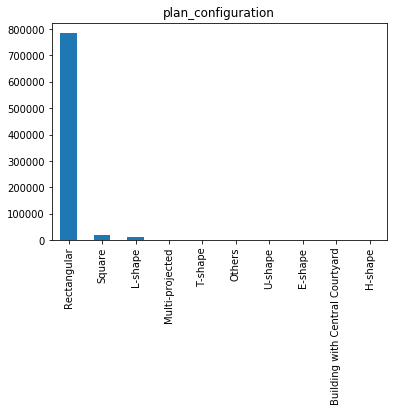

Rectangular                        95.899719
Square                              2.273116
L-shape                             1.386955
Multi-projected                     0.130695
T-shape                             0.128008
Others                              0.069867
U-shape                             0.066447
E-shape                             0.019055
Building with Central Courtyard     0.014535
H-shape                             0.011604
Name: plan_configuration, dtype: float64

damage_grade                     High-Severe  Low-Medium
plan_configuration                                      
Building with Central Courtyard     0.003636    0.031203
E-shape                             0.014747    0.025642
H-shape                             0.008889    0.015756
L-shape                             0.693311    2.447758
Multi-projected                     0.047675    0.257659
Others                              0.023636    0.140569
Rectangular                        96.804548   94.51

In [26]:
df["plan_configuration"].value_counts().plot(kind='bar', title="plan_configuration")
plt.show()
print(100 * df['plan_configuration'].value_counts() / len(df['plan_configuration']))
print('')
print(pd.crosstab(index=df["plan_configuration"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [37]:
# Los que están en L se puede ver más en los grados pequeños.
# Crear solo 2 categorías

In [13]:
df["plan_configuration"].replace(['Square',
 'Multi-projected',
 'T-shape',
 'Others',
 'U-shape',
 'E-shape',
 'Building with Central Courtyard',
 'H-shape'], "other", regex=True, inplace= True)

In [18]:
print(100 * df['plan_configuration'].value_counts() / len(df['plan_configuration']))
print('')
print(pd.crosstab(index=df["plan_configuration"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Rectangular    95.899719
other           2.713326
L-shape         1.386955
Name: plan_configuration, dtype: float64

damage_grade        High-Severe  Low-Medium
plan_configuration                         
L-shape                0.693311    2.447758
Rectangular           96.804548   94.515948
other                  2.502141    3.036295


### Legal Ownership: agrupada

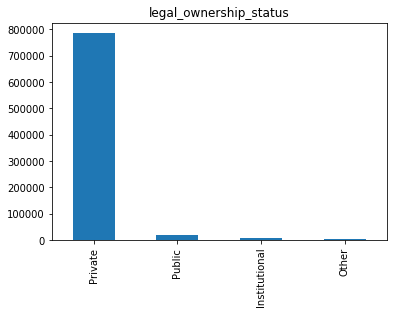

Private          96.005252
Public            2.455845
Institutional     1.070966
Other             0.467937
Name: legal_ownership_status, dtype: float64

damage_grade            High-Severe  Low-Medium
legal_ownership_status                         
Institutional              1.351673    0.641675
Other                      0.415744    0.547756
Private                   97.139486   94.270647
Public                     1.093096    4.539922



In [42]:
df["legal_ownership_status"].value_counts().plot(kind='bar', title="legal_ownership_status")
plt.show()
print(100 * df['legal_ownership_status'].value_counts() / len(df['legal_ownership_status']))
print('')
print(pd.crosstab(index=df["legal_ownership_status"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [40]:
# Los grados pequeños tiene más de Publico.
# Crear solo 2 categorías

In [14]:
df["legal_ownership_status"].replace(["Public", "Institutional", "Other"], "No Private", regex=True, inplace= True)

In [20]:
print(100 * df['legal_ownership_status'].value_counts() / len(df['legal_ownership_status']))
print('')
print(pd.crosstab(index=df["legal_ownership_status"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Private       96.005252
No Private     3.994748
Name: legal_ownership_status, dtype: float64

damage_grade            High-Severe  Low-Medium
legal_ownership_status                         
No Private                 2.860514    5.729353
Private                   97.139486   94.270647


### Gender Household head

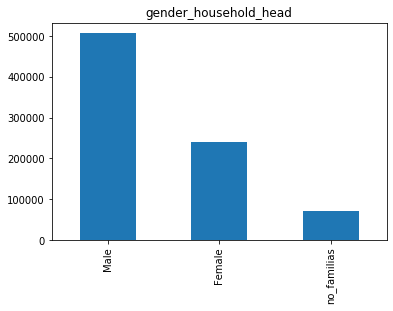

Male           62.017711
Female         29.239648
no_familias     8.742641
Name: gender_household_head, dtype: float64

damage_grade           High-Severe  Low-Medium
gender_household_head                         
Female                   26.590252   33.291420
Male                     65.877063   56.115532
no_familias               7.532686   10.593048



In [45]:
df["gender_household_head"].value_counts().plot(kind='bar', title="gender_household_head")
plt.show()
print(100 * df['gender_household_head'].value_counts() / len(df['gender_household_head']))
print('')
print(pd.crosstab(index=df["gender_household_head"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [43]:
# las familias con cabeza de familia Mujer, tienen menos daños, igual que las no familias 

### Education level: agrupada

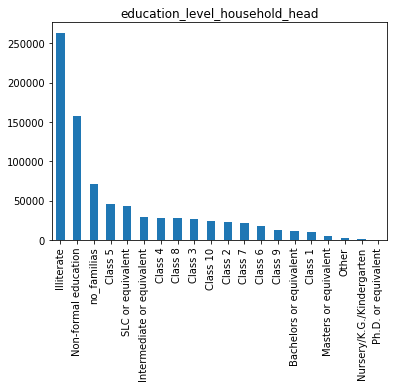

Illiterate                    32.142909
Non-formal education          19.264932
no_familias                    8.742641
Class 5                        5.528643
SLC or equivalent              5.250641
Intermediate or equivalent     3.564309
Class 4                        3.399902
Class 8                        3.361427
Class 3                        3.202150
Class 10                       2.943325
Class 2                        2.727617
Class 7                        2.621229
Class 6                        2.088433
Class 9                        1.488213
Bachelors or equivalent        1.334433
Class 1                        1.220960
Masters or equivalent          0.550507
Other                          0.346647
Nursery/K.G./Kindergarten      0.212654
Ph.D. or equivalent            0.008428
Name: education_level_household_head, dtype: float64

damage_grade                    High-Severe  Low-Medium
education_level_household_head                         
Bachelors or equivalent           

In [46]:
df["education_level_household_head"].value_counts().plot(kind='bar', title="education_level_household_head")
plt.show()

print(100 * df['education_level_household_head'].value_counts() / len(df['education_level_household_head']))
print('')

print(pd.crosstab(index=df["education_level_household_head"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

In [48]:
#https://www.nuffic.nl/sites/default/files/2020-08/education-system-nepal.pdf

# class 1 - 5: primary education
# class 6- 8: lower secundary
# class 9 - 10: Secondary. Aqui dan el titulo de SLC
# class 10-12: higger secondary
# Univeristy: bachelor, master and PHD

# Education mayoritarias: Illetrate y no formal

# Agrupamos como:

    # alta : PHD + master + bachelor 
    # media: intermediate + class 6-12 + SLC + Nursery
    # baja: illiterarte + non formal + other + Class 1 a class5


In [15]:
df["education_level_household_head"].replace(['Ph.D. or equivalent',
'Masters or equivalent',
'Bachelors or equivalent'], "High", regex=True, inplace= True)

In [16]:
df["education_level_household_head"].replace(['Intermediate or equivalent',
'SLC or equivalent',
'Nursery/K.G./Kindergarten',
'Other',
'Class 6',
'Class 7',                                                                     
'Class 8',
'Class 9',                                              
'Class 10'], "Medium", regex=True, inplace= True)               

In [17]:
df["education_level_household_head"].replace(['Intermediate or equivalent',
'Non-formal education',
'Other',
'Class 1',
'Class 2',                                                                     
'Class 3',
'Class 4',                                              
'Class 5'], "Low", regex=True, inplace= True)

In [18]:
print(100 * df['education_level_household_head'].value_counts() / len(df['education_level_household_head']))
print('')
print(pd.crosstab(index=df["education_level_household_head"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))


Low            35.344204
Illiterate     32.142909
Medium         21.876878
no_familias     8.742641
High            1.893368
Name: education_level_household_head, dtype: float64

damage_grade                    High-Severe  Low-Medium
education_level_household_head                         
High                               1.679744    2.220066
Illiterate                        33.930822   29.408621
Low                               35.782076   34.674559
Medium                            21.074672   23.103706
no_familias                        7.532686   10.593048


### Income level: agrupada

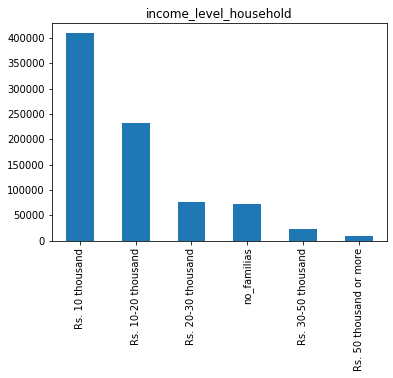

Rs. 10 thousand            49.969464
Rs. 10-20 thousand         28.298400
Rs. 20-30 thousand          9.298033
no_familias                 8.742641
Rs. 30-50 thousand          2.680225
Rs. 50 thousand or more     1.011237
Name: income_level_household, dtype: float64

damage_grade             High-Severe  Low-Medium
income_level_household                          
Rs. 10 thousand            52.320127   46.374550
Rs. 10-20 thousand         28.217876   28.421547
Rs. 20-30 thousand          8.633862   10.313763
Rs. 30-50 thousand          2.402751    3.104571
Rs. 50 thousand or more     0.892698    1.192521
no_familias                 7.532686   10.593048


In [52]:
df["income_level_household"].value_counts().plot(kind='bar', title="income_level_household")
plt.show()
print(100 * df['income_level_household'].value_counts() / len(df['income_level_household']))
print('')
print(pd.crosstab(index=df["income_level_household"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

In [54]:
#https://datosmacro.expansion.com/paises/nepal#:~:text=Su%20capital%20es%20Katmand%C3%BA%20y,habitante312%24%20dolares%20por%20habitante.
 
# Sueldo medio en Nepal 20-23,5 Rs

# incomes bajos (10rs): un poco mas en Grado alto, pero en G1 tb hay un % alto
# incomes intermedios (10-20): no hay diferencia
# incomes a partir de 20 están mas en Low

# Agrupamos como: bajo (10 + 10/20) / medio (20-30) / alto (30/50 + 50) / no familias

In [19]:
df["income_level_household"].replace(['Rs. 10 thousand',
'Rs. 10-20 thousand',], "Low", regex=True, inplace= True)

In [20]:
df["income_level_household"].replace(['Rs. 30-50 thousand',
'Rs. 50 thousand or more',], "High", regex=True, inplace= True)

In [21]:
df["income_level_household"].replace(['Rs. 20-30 thousand'], "Medium", regex=True, inplace= True)

In [28]:
print(100 * df['income_level_household'].value_counts() / len(df['income_level_household']))
print('')
print(pd.crosstab(index=df["income_level_household"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

Low            78.267864
Medium          9.298033
no_familias     8.742641
High            3.691462
Name: income_level_household, dtype: float64

damage_grade            High-Severe  Low-Medium
income_level_household                         
High                       3.295449    4.297092
Low                       80.538003   74.796097
Medium                     8.633862   10.313763
no_familias                7.532686   10.593048


### Casta: agrupada

In [73]:
print(100 * df['caste_household'].value_counts() / len(df['caste_household']))

Tamang                     25.536338
Chhetree                   15.682301
Brahman-Hill               13.402345
no_familias                 8.742641
Newar                       8.378771
Magar                       5.535605
Kami                        3.139123
Gurung                      3.108831
Sarki                       2.631733
Damai/Dholi                 1.885062
Rai                         1.352510
Sherpa                      1.205814
Thami                       0.896788
Majhi                       0.891291
Chepang/Praja               0.889092
Sunuwar                     0.882863
Danuwar                     0.814462
Gharti/Bhujel               0.688164
Ghale                       0.663735
Sanyasi/Dashnami            0.604373
Thakuri                     0.518383
Kumal                       0.511298
0thers                      0.406620
Pahari                      0.217418
Jirel                       0.215219
Musalman                    0.141566
Hyolmo                      0.127641
B

In [74]:
castas=pd.crosstab(index=df["caste_household"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0)

In [75]:
by_high_severe = castas.sort_values('High-Severe', ascending=False)
by_high_severe

damage_grade,High-Severe,Low-Medium
caste_household,,
Tamang,26.069864,24.720406
Chhetree,16.805921,13.963928
Brahman-Hill,13.423607,13.369830
Newar,7.910653,9.094673
no_familias,7.532686,10.593048
Magar,4.456826,7.185403
Gurung,3.696648,2.209871
Kami,3.330195,2.846912
Sarki,2.822939,2.339319


In [77]:
castas_income=pd.crosstab(index=df["caste_household"], columns=df['income_level_household']
    ).apply(lambda r: r/r.sum() *100,axis=0)

In [78]:
by_high = castas_income.sort_values('High', ascending=False)
by_high

income_level_household,High,Low,Medium,no_familias
caste_household,,,,
Brahman-Hill,24.356429,13.323939,22.315200,0.0
Tamang,20.455297,29.078668,21.746384,0.0
Chhetree,19.151611,16.914256,18.680294,0.0
Newar,14.320694,8.497626,12.897547,0.0
Magar,4.533122,6.260349,5.037899,0.0
Gurung,4.053339,3.361065,3.533755,0.0
Kami,2.021706,3.602334,2.635209,0.0
Sherpa,1.571703,1.334001,1.115300,0.0
Rai,1.105155,1.522210,1.293958,0.0


In [45]:
# Castas mayoritarias: Tamang, Chhetree, Brahman-Hill y Newar , pero en ellas no hay muchas diferencias entre grados
# Hay algunas castas que si se ve alguna diferencia pero tienen muy poca frecuencia, asi que agrupamos

In [22]:
df["caste_household"].replace([
 'Thami',
 'Majhi',
 'Chepang/Praja',
 'Sunuwar',
 'Danuwar',
 'Gharti/Bhujel',
 'Ghale',
 'Sanyasi/Dashnami',
 'Thakuri',
 'Kumal',
 '0thers',
 'Pahari',
 'Jirel',
 'Musalman',
 'Hyolmo',
 'Bhote',
 'Brahmu/Baramo',
 'Sonar',
 'Kamar',
 'Brahman-Tarai',
 'Hayu',
 'Musahar',
 'Darai',
 'Tharu',
 'Baraee',
 'Sudhi',
 'Yadav',
 'Jhangad/Dhagar',
 'Kalwar',
 'Teli',
 'Limbu',
 'Khawas',
 'Lohar',
 'Kumhar',
 'Hajam/Thakur',
 'Badi',
 'Dom',
 'Koiri/Kushwaha',
 'Kayastha',
 'Kanu',
 'Gaine',
 'Marwadi',
 'Haluwai',
 'Mallaha',
 'Badhaee',
 'Kurmi',
 'Rajbansi',
 'Kathbaniyan',
 'Dhanuk',
 'Rajput',
 'Bote',
 'Chamar/Harijan/Ram',
 'Nuniya',
 'Dhobi',
 'Bangali',
 'Gaderi/Bhedhar',
 'Raute',
 'Kewat',
 'Amat',
 'Bin',
 'Thakali',
 'Dusadh/Pasawan/Pasi',
 'Lhopa',
 'Tatma/Tatwa',
 'Kori',
 'Dhimal',
 'Bahing',
 'Mali',
 'Kusunda',
 'Khatwe',
 'Lepcha',
 'Samgpang',
 'Meche',
 'Chamling',
 'Kalar',
 'Satar/Santhal',
 'Kahar',
 'Natuwa',
 'Mewahang Bala',
 'Bantar/Sardar',
 'Yakkha',
 'Byasi/Sauka',
 'Pattharkatta/Kushwadiya',
 'Koche',
 'Dev'], "Other", regex=True, inplace= True)

In [30]:
print(pd.crosstab(index=df["caste_household"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))

damage_grade     High-Severe  Low-Medium
caste_household                         
Brahman-Hill       13.423607   13.369830
Chhetree           16.805921   13.963928
Damai/Dholi         2.052459    1.629058
Gurung              3.696648    2.209871
Kami                3.330195    2.846912
Magar               4.456826    7.185403
Newar               7.910653    9.094673
Other               9.535449    9.190136
Rai                 0.876739    2.080115
Sarki               2.822939    2.339319
Sherpa              1.486013    0.777301
Tamang             26.069864   24.720406
no_familias         7.532686   10.593048


In [80]:
## Vemos como han quedado las categorías:

In [23]:
for var in df.describe(include="object"):
    print('Categorías de', var, ':',df[var].unique())
    print('')

Categorías de land_surface_condition : ['Flat' 'No Flat']

Categorías de foundation_type : ['others' 'Mud mortar-Stone/Brick']

Categorías de roof_type : ['Bamboo/Timber-Light roof' 'Bamboo/Timber-Heavy roof' 'RCC/RB/RBC']

Categorías de ground_floor_type : ['Mud' 'others' 'RC']

Categorías de other_floor_type : ['Not applicable' 'Timber' 'RCC/RB/RBC']

Categorías de position : ['Not attached' 'Attached-1 side' 'Attached >1 side']

Categorías de plan_configuration : ['Rectangular' 'L-shape' 'other']

Categorías de damage_grade : ['Low-Medium' 'High-Severe']

Categorías de legal_ownership_status : ['Private' 'No Private']

Categorías de gender_household_head : ['Male' 'Female' 'no_familias']

Categorías de caste_household : ['Rai' 'Other' 'Brahman-Hill' 'no_familias' 'Chhetree' 'Tamang' 'Kami'
 'Newar' 'Gurung' 'Magar' 'Sarki' 'Damai/Dholi' 'Sherpa']

Categorías de education_level_household_head : ['Illiterate' 'Low' 'Medium' 'no_familias' 'High']

Categorías de income_level_household :

## Variables Booleanas

In [83]:
df_numerical = df.select_dtypes(include=[np.number])
df_bool = df_numerical.loc[:,df_numerical.nunique()==2]

In [62]:
df_bool.dtypes

has_superstructure_adobe_mud              int8
has_superstructure_mud_mortar_stone       int8
has_superstructure_stone_flag             int8
has_superstructure_cement_mortar_stone    int8
has_superstructure_mud_mortar_brick       int8
has_superstructure_cement_mortar_brick    int8
has_superstructure_timber                 int8
has_superstructure_bamboo                 int8
has_superstructure_rc_non_engineered      int8
has_superstructure_rc_engineered          int8
has_superstructure_other                  int8
has_secondary_use                         int8
has_secondary_use_agriculture             int8
has_secondary_use_hotel                   int8
has_secondary_use_rental                  int8
has_secondary_use_institution             int8
has_secondary_use_school                  int8
has_secondary_use_industry                int8
has_secondary_use_gov_office              int8
has_secondary_use_use_police              int8
has_secondary_use_other                   int8
is_bank_accou

### Has secondary use_X: las eliminamos

In [63]:
# Hay 101.642 edificios que tienen un uso secundario, de los cuales:
# Rental = 9.086 
# Institution = 939
# Industry = 924
# Police = 73
# Goberment = 162
# Other use = 3641
# School = 339
# Agricultura = 57833 -> medium + high
# Hotel = 29905

# Hay 180 edificios que al menos tienen 2 usos

# Los edificios que SI tienen un uso secundario son los edificios menos dañados por lo general. 
# Si lo vemos por uso secundario específico, podemos decir que los que tienen un uso secundario tienen menos daño, 
# a excepcion de agricultura, que se ve un poco más repartido
# Eliminamos esas variables. Al dejar "has secondario use", si es 1  ya nos dice que tiene relacion con el nivel de daño.

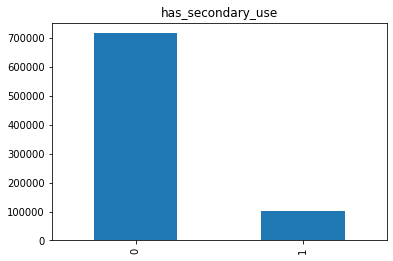

damage_grade       High-Severe  Low-Medium
has_secondary_use                         
0                    90.132238   83.689339
1                     9.867762   16.310661



In [84]:
df["has_secondary_use"].value_counts().plot(kind='bar', title="has_secondary_use")
plt.show()
print(pd.crosstab(index=df["has_secondary_use"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

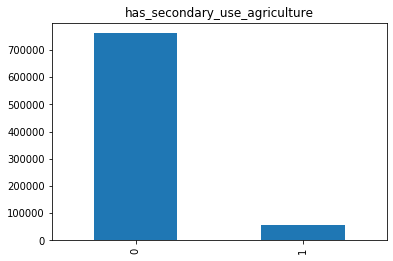

damage_grade                   High-Severe  Low-Medium
has_secondary_use_agriculture                         
0                                92.596401   93.455345
1                                 7.403599    6.544655



In [85]:
df["has_secondary_use_agriculture"].value_counts().plot(kind='bar', title="has_secondary_use_agriculture")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_agriculture"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

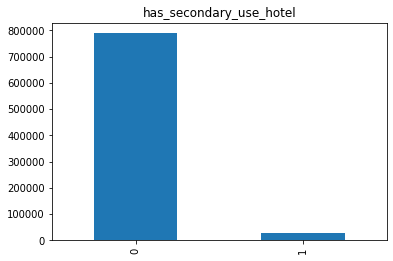

damage_grade             High-Severe  Low-Medium
has_secondary_use_hotel                         
0                          98.079658   93.697866
1                           1.920342    6.302134



In [86]:
df["has_secondary_use_hotel"].value_counts().plot(kind='bar', title="has_secondary_use_hotel")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_hotel"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

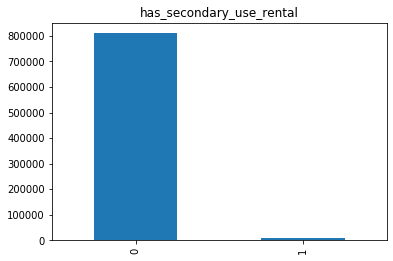

damage_grade              High-Severe  Low-Medium
has_secondary_use_rental                         
0                           99.785057   97.521657
1                            0.214943    2.478343



In [87]:
df["has_secondary_use_rental"].value_counts().plot(kind='bar', title="has_secondary_use_rental")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_rental"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

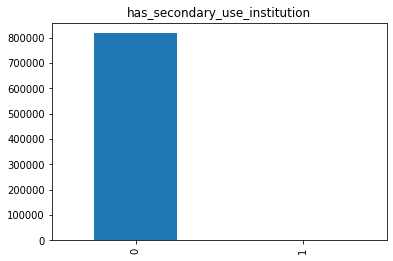

damage_grade                   High-Severe  Low-Medium
has_secondary_use_institution                         
0                                99.969294   99.756862
1                                 0.030706    0.243138



In [88]:
df["has_secondary_use_institution"].value_counts().plot(kind='bar', title="has_secondary_use_institution")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_institution"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

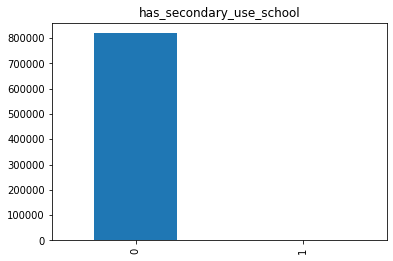

damage_grade              High-Severe  Low-Medium
has_secondary_use_school                         
0                           99.983233   99.920911
1                            0.016767    0.079089



In [89]:
df["has_secondary_use_school"].value_counts().plot(kind='bar', title="has_secondary_use_school")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_school"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

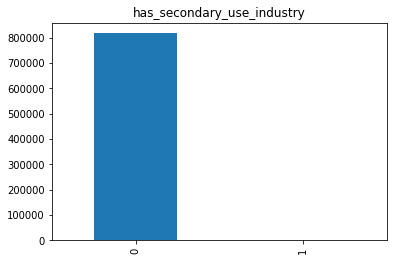

damage_grade                High-Severe  Low-Medium
has_secondary_use_industry                         
0                              99.91778   99.840276
1                               0.08222    0.159724



In [90]:
df["has_secondary_use_industry"].value_counts().plot(kind='bar', title="has_secondary_use_industry")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_industry"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

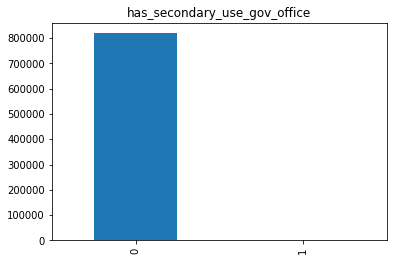

damage_grade                  High-Severe  Low-Medium
has_secondary_use_gov_office                         
0                               99.991111   99.963545
1                                0.008889    0.036455



In [91]:
df["has_secondary_use_gov_office"].value_counts().plot(kind='bar', title="has_secondary_use_gov_office")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_gov_office"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

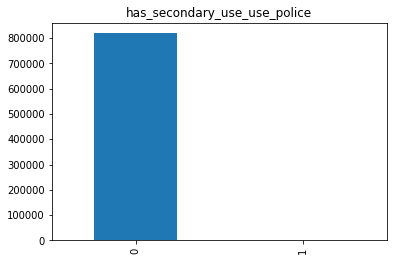

damage_grade                  High-Severe  Low-Medium
has_secondary_use_use_police                         
0                                99.99293    99.98826
1                                 0.00707     0.01174



In [92]:
df["has_secondary_use_use_police"].value_counts().plot(kind='bar', title="has_secondary_use_use_police")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_use_police"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

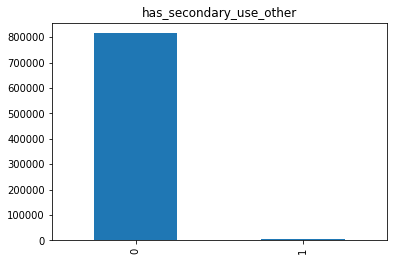

damage_grade             High-Severe  Low-Medium
has_secondary_use_other                         
0                          99.679202   99.365739
1                           0.320798    0.634261



In [93]:
df["has_secondary_use_other"].value_counts().plot(kind='bar', title="has_secondary_use_other")
plt.show()
print(pd.crosstab(index=df["has_secondary_use_other"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

In [24]:
has_secondary_use_x= [i for i,x in enumerate(df.columns) if ('has_secondary_use_' in x)]
df =df.drop(df.columns[has_secondary_use_x],axis=1)

### Has Superstructure: las dejamos todas

In [87]:
# "superstucture de adobe_mud": no hay diferencia

# "superstucture de mud_mortar_stone": high-severe
# "superstucture de stone_flag": high-severe

# "superstucture de cement_mortar_stone": low-medium
# "superstucture de mud_mortar_brick": low-medium
# "superstructure_cement_mortar_brick": low-medium
# "superstucture de timber": low
# "superstucture de bamboo": low
# "superstucture de rc enginiered": low
# "superstucture de rc enginiered": low
# "superstucture de otra cosa": low

# En resumen: 
# los edificios que tengas superestructura de MUD MORTAR STONE y STONE FLAG, están en los daños altos.
# El resto en los daños bajos

In [95]:
df_bool.dtypes

has_superstructure_adobe_mud              int8
has_superstructure_mud_mortar_stone       int8
has_superstructure_stone_flag             int8
has_superstructure_cement_mortar_stone    int8
has_superstructure_mud_mortar_brick       int8
has_superstructure_cement_mortar_brick    int8
has_superstructure_timber                 int8
has_superstructure_bamboo                 int8
has_superstructure_rc_non_engineered      int8
has_superstructure_rc_engineered          int8
has_superstructure_other                  int8
has_secondary_use                         int8
has_secondary_use_agriculture             int8
has_secondary_use_hotel                   int8
has_secondary_use_rental                  int8
has_secondary_use_institution             int8
has_secondary_use_school                  int8
has_secondary_use_industry                int8
has_secondary_use_gov_office              int8
has_secondary_use_use_police              int8
has_secondary_use_other                   int8
is_bank_accou

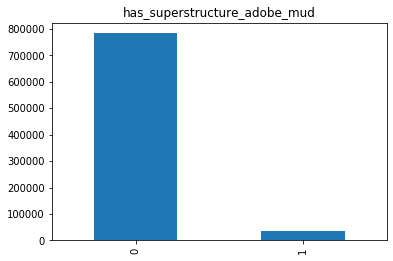

damage_grade                  High-Severe  Low-Medium
has_superstructure_adobe_mud                         
0                               95.774884   95.610225
1                                4.225116    4.389775



In [32]:
df["has_superstructure_adobe_mud"].value_counts().plot(kind='bar', title="has_superstructure_adobe_mud")
plt.show()
print(pd.crosstab(index=df["has_superstructure_adobe_mud"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

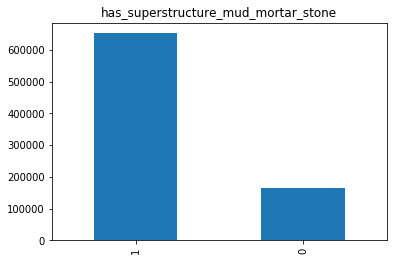

damage_grade                         High-Severe  Low-Medium
has_superstructure_mud_mortar_stone                         
0                                       7.259563   40.217311
1                                      92.740437   59.782689



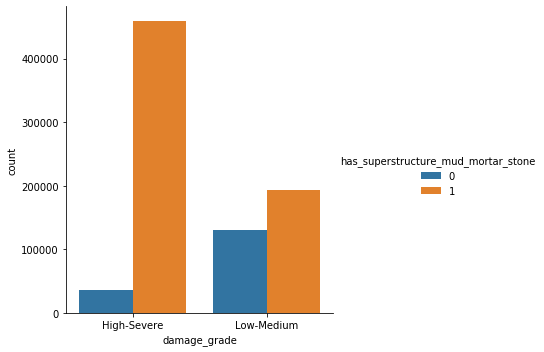

In [33]:
df["has_superstructure_mud_mortar_stone"].value_counts().plot(kind='bar', title="has_superstructure_mud_mortar_stone")
plt.show()
print(pd.crosstab(index=df["has_superstructure_mud_mortar_stone"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "has_superstructure_mud_mortar_stone", order=order)

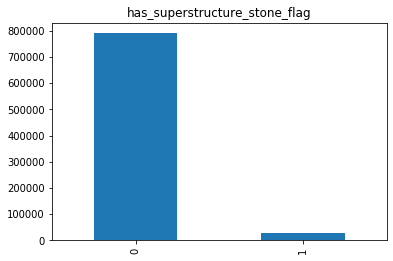

damage_grade                   High-Severe  Low-Medium
has_superstructure_stone_flag                         
0                                95.706401   97.713202
1                                 4.293599    2.286798



In [34]:
df["has_superstructure_stone_flag"].value_counts().plot(kind='bar', title="has_superstructure_stone_flag")
plt.show()
print(pd.crosstab(index=df["has_superstructure_stone_flag"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

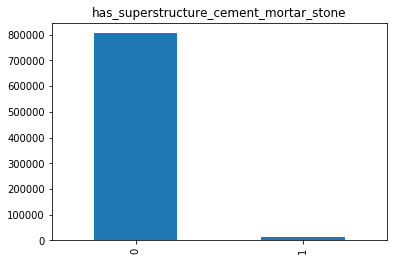

damage_grade                            High-Severe  Low-Medium
has_superstructure_cement_mortar_stone                         
0                                          99.03094    97.40395
1                                           0.96906     2.59605



In [35]:
df["has_superstructure_cement_mortar_stone"].value_counts().plot(kind='bar', title="has_superstructure_cement_mortar_stone")
plt.show()
print(pd.crosstab(index=df["has_superstructure_cement_mortar_stone"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

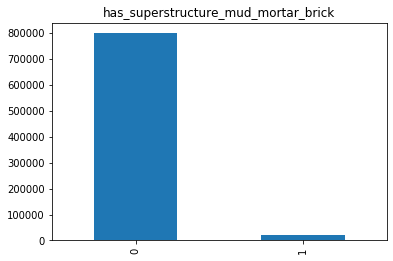

damage_grade                         High-Severe  Low-Medium
has_superstructure_mud_mortar_brick                         
0                                      98.099657   96.930031
1                                       1.900343    3.069969



In [36]:
df["has_superstructure_mud_mortar_brick"].value_counts().plot(kind='bar', title="has_superstructure_mud_mortar_brick")
plt.show()
print(pd.crosstab(index=df["has_superstructure_mud_mortar_brick"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

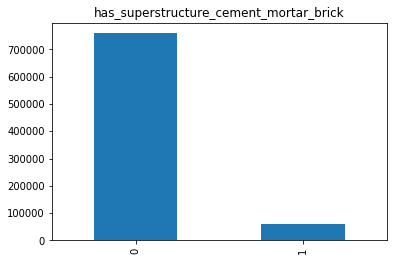

damage_grade                            High-Severe  Low-Medium
has_superstructure_cement_mortar_brick                         
0                                          98.87539   83.122119
1                                           1.12461   16.877881



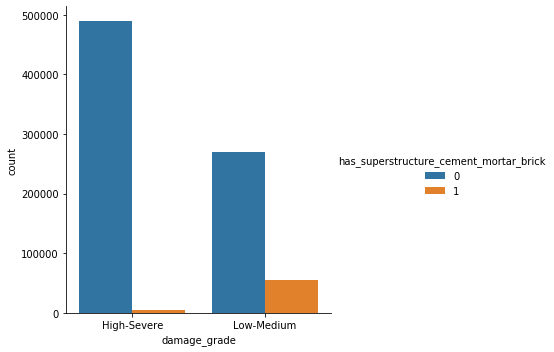

In [37]:
df["has_superstructure_cement_mortar_brick"].value_counts().plot(kind='bar', title="has_superstructure_cement_mortar_brick")
plt.show()
print(pd.crosstab(index=df["has_superstructure_cement_mortar_brick"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')
order = sorted(df["damage_grade"].unique()) 
sns.catplot(x = "damage_grade", data = df, kind = "count", hue = "has_superstructure_cement_mortar_brick", order=order)

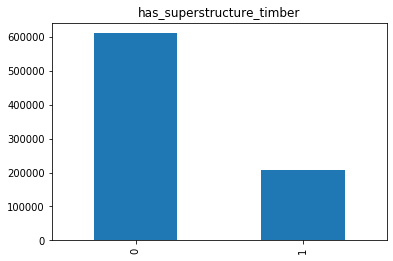

damage_grade               High-Severe  Low-Medium
has_superstructure_timber                         
0                            77.953642   69.329964
1                            22.046358   30.670036



In [38]:
df["has_superstructure_timber"].value_counts().plot(kind='bar', title="has_superstructure_timber")
plt.show()
print(pd.crosstab(index=df["has_superstructure_timber"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

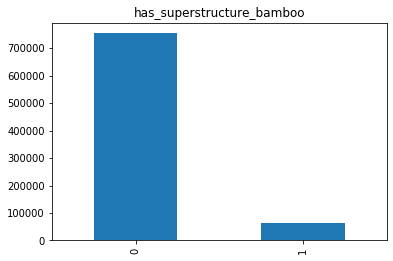

damage_grade               High-Severe  Low-Medium
has_superstructure_bamboo                         
0                            94.320184   88.794009
1                             5.679816   11.205991



In [39]:
df["has_superstructure_bamboo"].value_counts().plot(kind='bar', title="has_superstructure_bamboo")
plt.show()
print(pd.crosstab(index=df["has_superstructure_bamboo"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

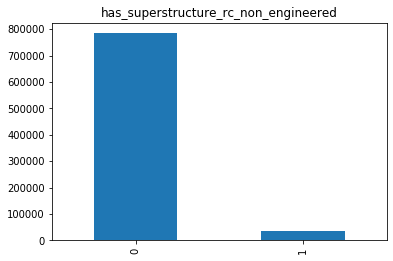

damage_grade                          High-Severe  Low-Medium
has_superstructure_rc_non_engineered                         
0                                       98.687315   91.278222
1                                        1.312685    8.721778



In [40]:
df["has_superstructure_rc_non_engineered"].value_counts().plot(kind='bar', title="has_superstructure_rc_non_engineered")
plt.show()
print(pd.crosstab(index=df["has_superstructure_rc_non_engineered"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

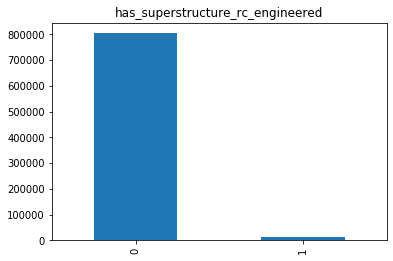

damage_grade                      High-Severe  Low-Medium
has_superstructure_rc_engineered                         
0                                   99.943638   95.517851
1                                    0.056362    4.482149



In [41]:
df["has_superstructure_rc_engineered"].value_counts().plot(kind='bar', title="has_superstructure_rc_engineered")
plt.show()
print(pd.crosstab(index=df["has_superstructure_rc_engineered"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

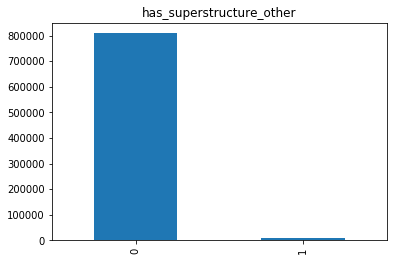

damage_grade              High-Severe  Low-Medium
has_superstructure_other                         
0                           99.126291   98.295251
1                            0.873709    1.704749



In [42]:
df["has_superstructure_other"].value_counts().plot(kind='bar', title="has_superstructure_other")
plt.show()
print(pd.crosstab(index=df["has_superstructure_other"], columns=df['damage_grade']
    ).apply(lambda r: r/r.sum() *100,axis=0))
print('')

## Variables Numéricas

In [107]:
df_no_bool = df_numerical.loc[:,df_numerical.nunique()!=2]

In [108]:
df_no_bool.dtypes

count_floors_pre_eq     int8
age_building           int16
plinth_area_sq_ft      int16
height_ft_pre_eq        int8
count_families          int8
age_household_head      int8
size_household          int8
dtype: object

## Transformaciones

### Age building: LOG

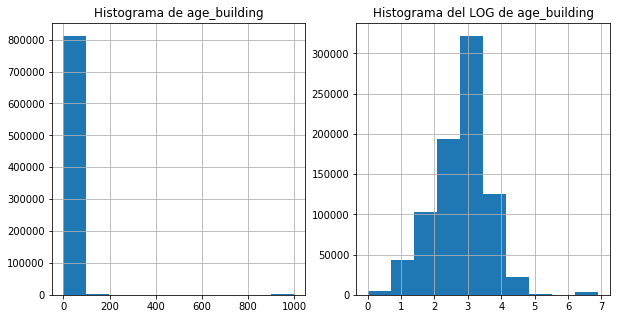

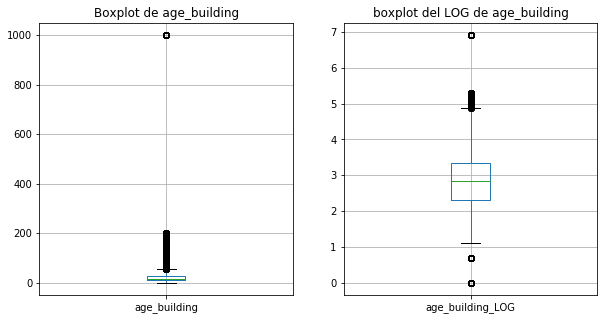

In [102]:
var = "age_building"

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()

df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Count Floors

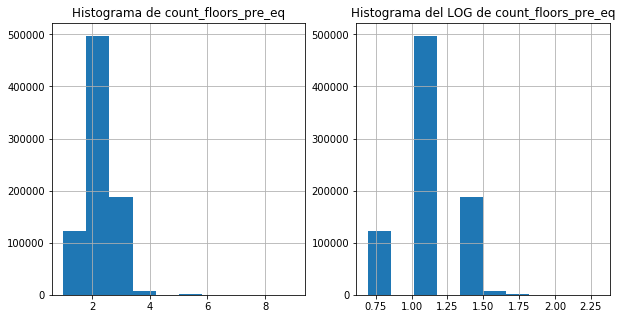

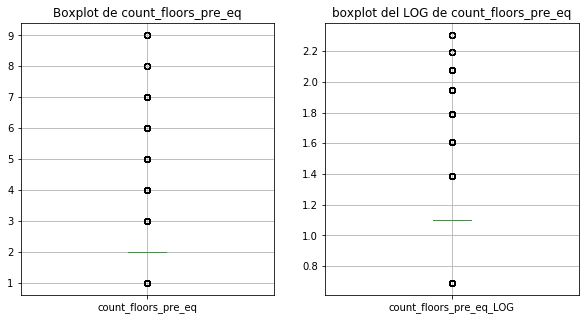

In [103]:
var = "count_floors_pre_eq" 

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Height: LOG

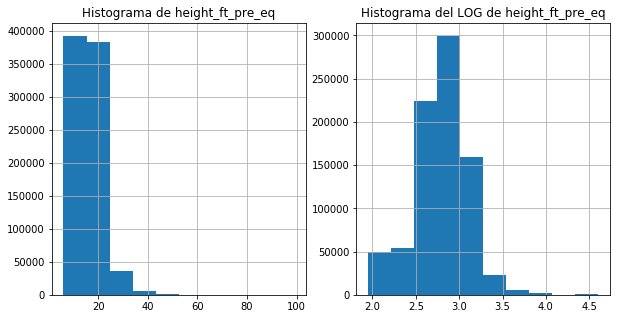

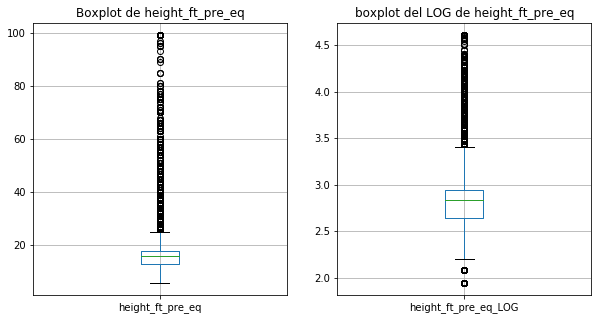

In [104]:
var = "height_ft_pre_eq"

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Plinth Area: LOG

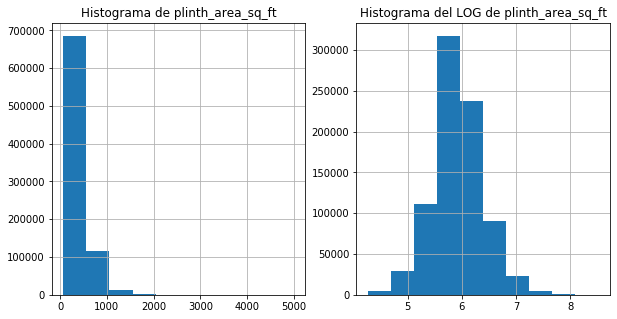

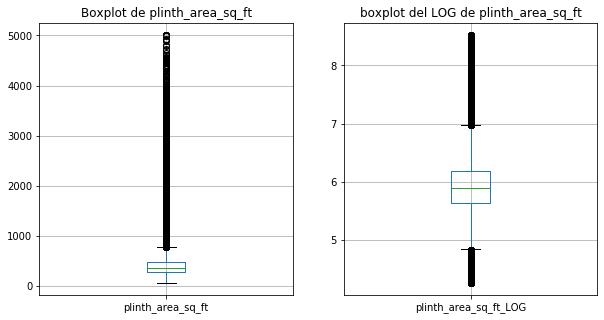

In [105]:
var = "plinth_area_sq_ft" 

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Age Household head

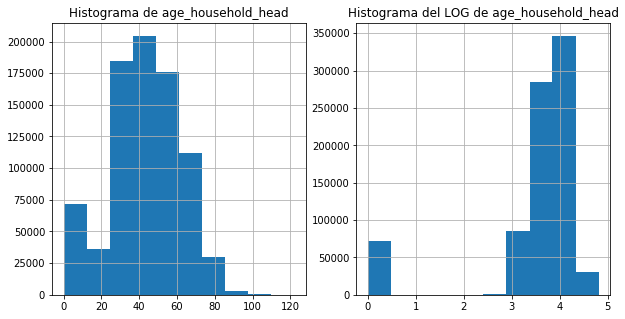

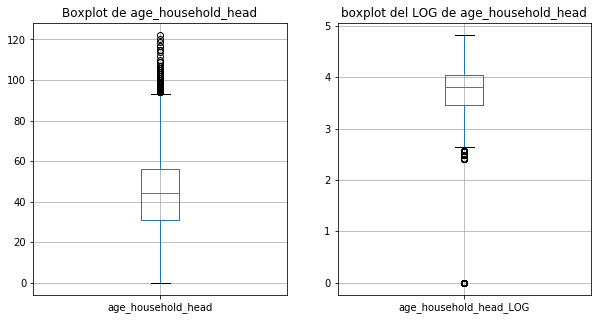

In [106]:
var = "age_household_head"

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Count Families

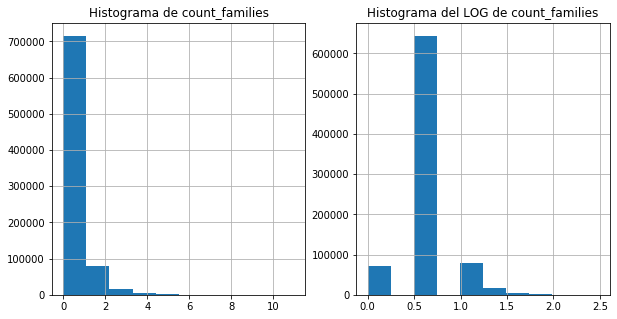

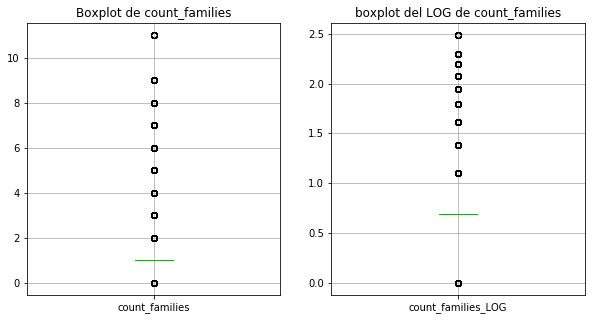

In [107]:
var = "count_families" 

df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

### Size household: LOG

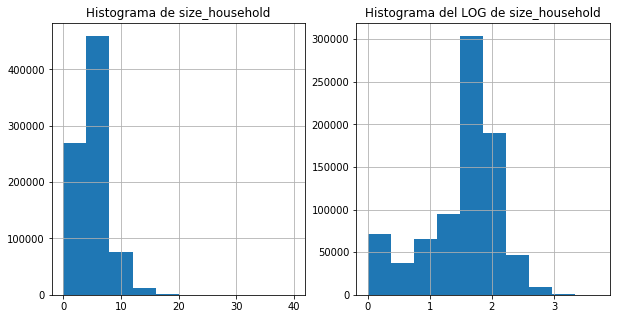

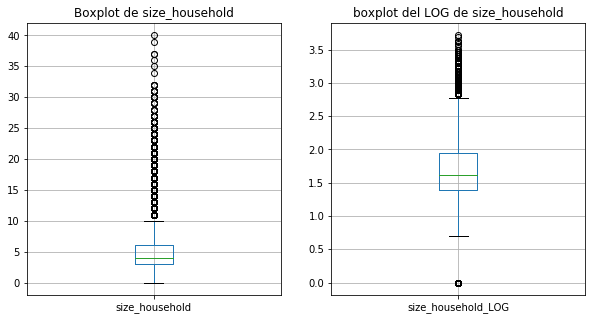

In [108]:
var = "size_household" 


df_no_bool [var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool[var].hist()
plt.title('Histograma de ' + var)
plt.subplot(1,2,2)
df_no_bool[var + '_LOG'] .hist()
plt.title('Histograma del LOG de ' + var)
plt.show()


df_no_bool[var + '_LOG'] = np.log(1 + df_no_bool[var])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_no_bool.boxplot(var)
plt.title('Boxplot de ' + var)
plt.subplot(1,2,2)
df_no_bool.boxplot(var + '_LOG')
plt.title('boxplot del LOG de ' + var)
plt.show()

In [109]:
# Seleccionamos las variables a las que vamos a aplicar el LOG:
 # Age_building
 # Height
 # Plinth
 # Size household

In [25]:
df["age_building"] = np.log(1 + df["age_building"])
df["height_ft_pre_eq"] = np.log(1 + df["height_ft_pre_eq"])
df["plinth_area_sq_ft"] = np.log(1 + df["plinth_area_sq_ft"])
df["size_household"] = np.log(1 + df["size_household"])

In [111]:
# RESUMEN:
# Daños bajos: menos plantas, edificios mas nuevos, bases mas grandes, edificios más bajos
# Age_household_head / Count Families / Size household: no parece que afecte

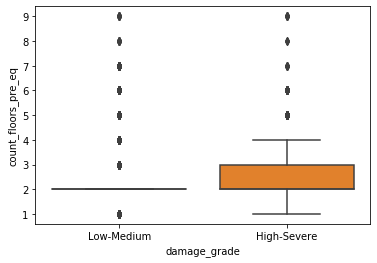

In [44]:
sns.boxplot(x="damage_grade", y="count_floors_pre_eq", data=df)

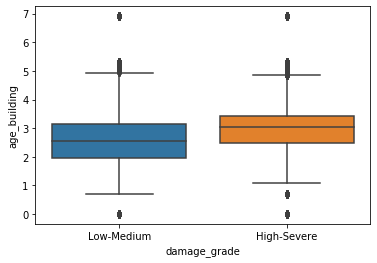

In [45]:
sns.boxplot(x="damage_grade", y="age_building", data=df)

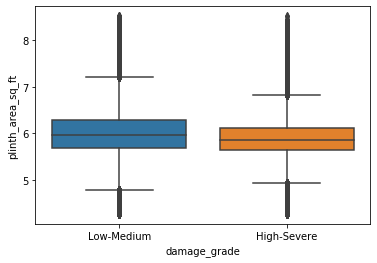

In [46]:
sns.boxplot(x="damage_grade", y="plinth_area_sq_ft", data=df)

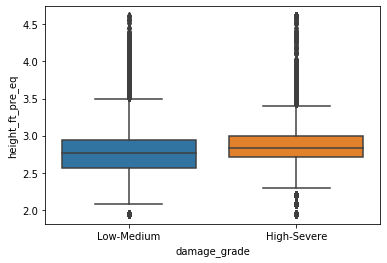

In [47]:
sns.boxplot(x="damage_grade", y="height_ft_pre_eq", data=df)

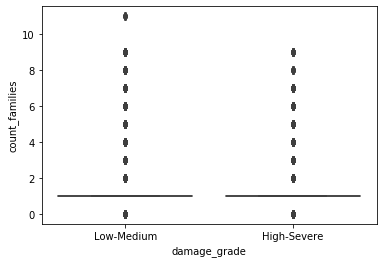

In [48]:
sns.boxplot(x="damage_grade", y="count_families", data=df)

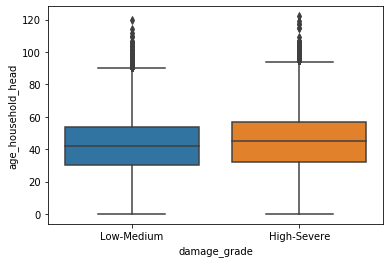

In [49]:
sns.boxplot(x="damage_grade", y="age_household_head", data=df)

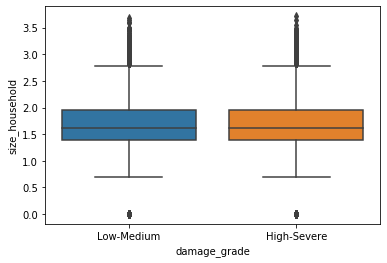

In [50]:
sns.boxplot(x="damage_grade", y="size_household", data=df)

# 5. Contraste Chi2 en variables categóricas

In [ ]:
# Como hay muchos datos, siempre encontrará alguna relación, asi que el contraste nos dará no rechazar la independencia

In [198]:
df.dtypes

ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64


In [199]:
from scipy.stats import chi2_contingency

for i,var in enumerate(df.describe(include='object')):

    observados = pd.crosstab(index=df[var],columns=df['damage_grade'], margins= True)
    stat, p, dof, expected= chi2_contingency(observados)   
 
    
    print('Variable', var, ':')
    alpha = 0.05
    print("p value is "   + str(p))  
    if p <= alpha: 
        print('Dependent (reject H0)') 
    else: 
        print('Independent (H0 holds true)') 
    print('')

Variable land_surface_condition :
p value is 3.0255697024777763e-45
Dependent (reject H0)

Variable foundation_type :
p value is 0.0
Dependent (reject H0)

Variable roof_type :
p value is 0.0
Dependent (reject H0)

Variable ground_floor_type :
p value is 0.0
Dependent (reject H0)

Variable other_floor_type :
p value is 0.0
Dependent (reject H0)

Variable position :
p value is 0.0
Dependent (reject H0)

Variable plan_configuration :
p value is 0.0
Dependent (reject H0)

Variable damage_grade :
p value is 0.0
Dependent (reject H0)

Variable legal_ownership_status :
p value is 0.0
Dependent (reject H0)

Variable gender_household_head :
p value is 0.0
Dependent (reject H0)

Variable caste_household :
p value is 0.0
Dependent (reject H0)

Variable education_level_household_head :
p value is 0.0
Dependent (reject H0)

Variable income_level_household :
p value is 0.0
Dependent (reject H0)



# 6. Contraste Chi2 en booleanas

In [200]:
df_numerical = df.select_dtypes(include=[np.number])
df_bool= df_numerical.loc[:,df_numerical.nunique()==2]

In [201]:
#https://es.linkedin.com/learning/python-para-data-science-y-big-data-esencial/test-de-la-chi-cuadrado

from scipy.stats import chi2_contingency

for i,var in enumerate(df_bool):

    observados = pd.crosstab(index=df_bool[var],columns=df['damage_grade'], margins= True)
    stat, p, dof, expected= chi2_contingency(observados)   
 
    
    print('Variable', var, ':')
    alpha = 0.05
    print("p value is "   + str(p))  
    if p <= alpha: 
        print('Dependent (reject H0)') 
    else: 
        print('Independent (H0 holds true)') 
    print('')

Variable has_superstructure_adobe_mud :
p value is 0.011659856518696358
Dependent (reject H0)

Variable has_superstructure_mud_mortar_stone :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_stone_flag :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_cement_mortar_stone :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_mud_mortar_brick :
p value is 5.605576233134435e-250
Dependent (reject H0)

Variable has_superstructure_cement_mortar_brick :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_timber :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_bamboo :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_rc_non_engineered :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_rc_engineered :
p value is 0.0
Dependent (reject H0)

Variable has_superstructure_other :
p value is 4.578671783301148e-245
Dependent (reject H0)

Variable has_secondary_use :
p value is 0.0
Depend

In [27]:
df.to_csv("paso_2_agrupaciones_con_building_id.csv")

In [29]:
df_paso2=pd.read_csv("paso_2_agrupaciones_con_building_id.csv", sep=',')

In [30]:
df_paso2.dtypes

Unnamed: 0                                  int64
building_id                                 int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64


In [31]:
df_paso2.shape

(818700, 36)